In [10]:
import numpy as np
import sys
# import sklearn.model_selection as skl
# from sklearn.model_selection import train_test_split
import pickle

from keras.applications.resnet import decode_predictions

import matplotlib
import matplotlib.pyplot as plt
import time
import PIL

import os

from annoy import AnnoyIndex

plt.rcParams["figure.figsize"]=1,1

In [11]:
# https://wiki.python.org/moin/UsingPickle

chunk_1 = pickle.load(open("imagenet_val_1000_encoding_" + str(1) + ".p", "rb") ) 
print(chunk_1.shape)
chunk_2 = pickle.load(open("imagenet_val_1000_encoding_" + str(2) + ".p", "rb") ) 
print(chunk_2.shape)
chunk_3 = pickle.load(open("imagenet_val_1000_encoding_" + str(3) + ".p", "rb") ) 
print(chunk_3.shape)
chunk_4 = pickle.load(open("imagenet_val_1000_encoding_" + str(4) + ".p", "rb") ) 
print(chunk_4.shape)
chunk_5 = pickle.load(open("imagenet_val_1000_encoding_" + str(5) + ".p", "rb") ) 
print(chunk_5.shape)

# encodings = np.concatenate([chunk_1])#, chunk_2, chunk_3, chunk_4, chunk_5], axis = 0)
encodings = np.concatenate([chunk_1, chunk_2, chunk_3, chunk_4, chunk_5], axis = 0)

(10000, 1000)
(10000, 1000)
(10000, 1000)
(10000, 1000)
(10000, 1000)


In [13]:
print(encodings.shape)
# print(encodings[0])
print(np.argmax(encodings[0]))
print(encodings[0][np.argmax(encodings[0])])

(50000, 1000)
48
0.37662745


In [14]:
# Use Brute Force:

# %%timeit

start_time = time.time()

first = encodings[2, :]
dist_from_first = []


for idx, item in enumerate(encodings):
    dist_from_first.append((np.linalg.norm(first-item), idx))
        
dist_from_first.sort()

end_time = time.time()

print(end_time - start_time)

print(dist_from_first)



0.5176749229431152
[(0.0, 2), (0.33483675, 8164), (0.33836257, 41711), (0.3714684, 11833), (0.37280858, 11714), (0.37341928, 10722), (0.3854772, 39695), (0.38760772, 13682), (0.3897411, 11817), (0.3909111, 11915), (0.3933117, 22837), (0.39597437, 14891), (0.39597565, 37924), (0.3984346, 40202), (0.40753612, 19752), (0.4099954, 22383), (0.41958752, 48906), (0.4215562, 24438), (0.4230081, 37909), (0.42311335, 10725), (0.4240691, 37943), (0.43903282, 11391), (0.4423287, 2502), (0.4429327, 11725), (0.4436399, 21695), (0.44446725, 25957), (0.44506884, 41936), (0.4461665, 35534), (0.4463359, 36216), (0.44688633, 36550), (0.44791898, 8293), (0.44825825, 33803), (0.449306, 2353), (0.45128742, 21109), (0.453128, 37928), (0.4562695, 38787), (0.4563109, 21593), (0.45683298, 17995), (0.45719042, 26160), (0.45739064, 19164), (0.45761496, 20963), (0.45761767, 44144), (0.45763484, 29931), (0.4576529, 11823), (0.45832285, 42090), (0.45858747, 18081), (0.45889837, 21118), (0.45935422, 44298), (0.459359

In [ ]:
# Use Annoy:

t = AnnoyIndex(2048, 'euclidean')

for idx, item in enumerate(encodings):
    t.add_item(idx, item)
    
# t.get_nns_by_item(0, 100)
t.build(100)
t.save('imagenet_val_encodings.ann')

In [ ]:
u = AnnoyIndex(2048, 'euclidean')
u.load('imagenet_val_encodings.ann')


In [ ]:
start_time = time.time()

u.get_nns_by_item(0, 1000)

end_time = time.time()

print(end_time - start_time)

In [16]:
# Generate corresponding filepaths:

# Generate target directories:
cwd = os.getcwd()
cwd += '/ImageNet/organized_validation/'

# print(cwd)

files_all = []

for i in range(1,1001):
    files = os.listdir(cwd + str(i))  # Get all the files in that directory
#     print(files)

    files_all += [str(i) + '/' + x for x in files]

print(len(files_all))

50000


In [ ]:
files_all

In [ ]:
PIL.Image.open(cwd + files_all[5])

Query Time:
0.4842550754547119


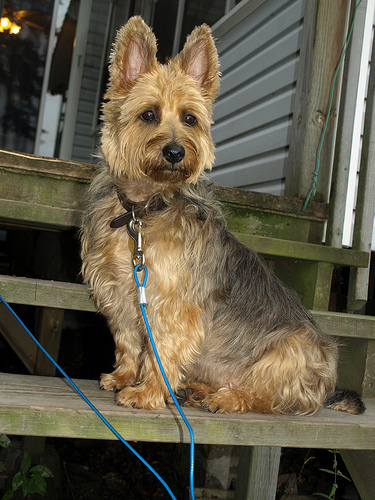

3


TypeError: list indices must be integers or slices, not tuple

In [35]:
# Use Brute Force:

# %%timeit
def brute_force(query_index, num_nearest_n):
    start_time = time.time()

    first = encodings[query_index, :]
    dist_from_first = []


    for idx, item in enumerate(encodings):
#         dist_from_first.append((np.linalg.norm((first)/np.linalg.norm(first)-(item)/np.linalg.norm(item)), idx))
        dist_from_first.append((np.linalg.norm((first) - (item)), idx, item))
    
    dist_from_first.sort()
    
#     print(dist_from_first[0].shape)

    end_time = time.time()

    print('Query Time:')
    print(end_time - start_time)

#     for i in range(10):
#         print(dist_from_first[i][0:2])
    
    query_img = PIL.Image.open(cwd + files_all[query_index])
#     query_img.show()
    display(query_img)
    
    print(len(dist_from_first[0]))
    
    for i in range(num_nearest_n):
        
        result_index = dist_from_first[i]
#         print(result_index.shape)
        result_vector = dist_from_first[i][2]
#         pred = result_vector.reshape(1, 1000)
#         print(dist_from_first[0])
        decoded = decode_predictions(result_vector.reshape(1, 1000), top=3)

#         pred = encodings[i].reshape(1, 1000)
#         decoded = decode_predictions(
#                 pred, top=3
#                 )
#         print(decoded)
        
#         print(result_index)
        
        result_img = PIL.Image.open(cwd + files_all[result_index])
#         result_img = PIL.Image.open(cwd + files_all[i])
#         result_img.show()
        display(result_img)


# brute_force(1180, 20)

brute_force(190, 20)